In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000,gamma=1):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.gamma = gamma

#     def dot_kernal(self,X):
#         return np.dot(X,X.T)
    def kernal(self,X):
        l = [ ]
        for i in X:
            diff = np.square(np.linalg.norm((i-self.X),axis=1))
            l.append(np.exp(-self.gamma*diff))
        return np.array(l)
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.X = X
        X = self.kernal(X)
        for i in X:
            diff = i-X
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        X = self.kernal(X)
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [5]:
df = pd.read_csv("data5.csv",header=None)
df.head()

,0,1,2
0,3.8737,3.3983,-1
1,3.0308,3.0174,-1
2,3.1599,3.7596,1
3,2.5971,2.9184,1
4,3.3975,3.0635,-1


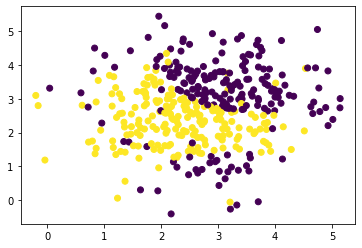

In [6]:
plt.scatter(df[0],df[1],c=df[2])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[[0,1]],df[2],test_size=0.3)

In [34]:
svm = SVM(gamma=0.5)
svm.fit(X_train,y_train)

In [35]:
y_predicted = svm.predict(np.array(X_test))

In [36]:
len(y_test[y_predicted==y_test])/len(y_test)

0.9083333333333333

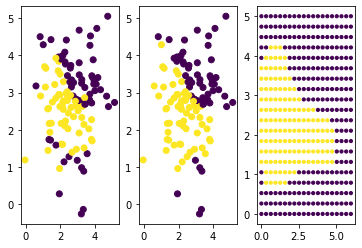

In [49]:
figure, axis = plt.subplots(1,3)
l = np.array(l)
axis[0].scatter(X_test[0],X_test[1],c=y_test)
axis[1].scatter(X_test[0],X_test[1],c=y_predicted)
axis[2].scatter(l[:,0],l[:,1],c = y_p,s=10)
plt.show()

# df.plot()
# plt.scatter(X_test[0],X_test[1],c=y_test)

## Decision Boundary

In [40]:
l = [ ]
x = np.linspace(0,6,20)
y = np.linspace(0,5,20)
for i in x:
    for j in y:
        l.append([i,j])
y_p  = svm.predict(np.array(l))

In [46]:
np.array(l)[:,1]
# plt.scatter(l)

array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ,
       0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ,
       0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ,
       0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421